In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv(r'/kaggle/input/titanic/train.csv')
X_test = pd.read_csv(r'/kaggle/input/titanic/test.csv')

In [3]:
X_train = train_data.drop("Survived", axis= 1)
y_train = train_data["Survived"]

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.shape, X_test.shape

((891, 12), (418, 11))

In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data["Name"].nunique()

891

In [10]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

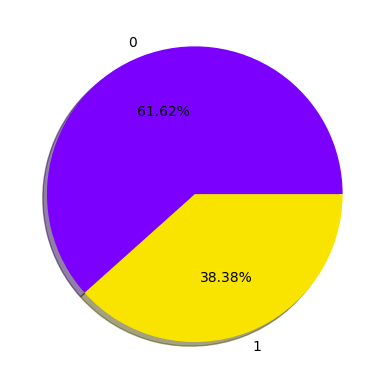

In [11]:
colors = ['#7C00FE', '#F9E400']
plt.pie( x = train_data['Survived'].value_counts(),
        labels = [0, 1], autopct = '%.2f%%', shadow = True, colors = colors)
plt.show()

In [12]:
train_data["Sex"].unique()

array(['male', 'female'], dtype=object)

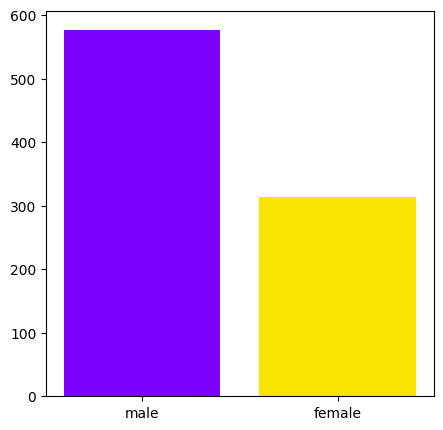

In [13]:
plt.figure(figsize = (5, 5))
plt.bar(x = train_data["Sex"].unique(),
        height = train_data["Sex"].value_counts(),
        width= 0.8,
        color = colors);

In [14]:
num_features = train_data.select_dtypes(include = [np.number])
correlations = num_features.corrwith(train_data['Survived'])
correlations

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

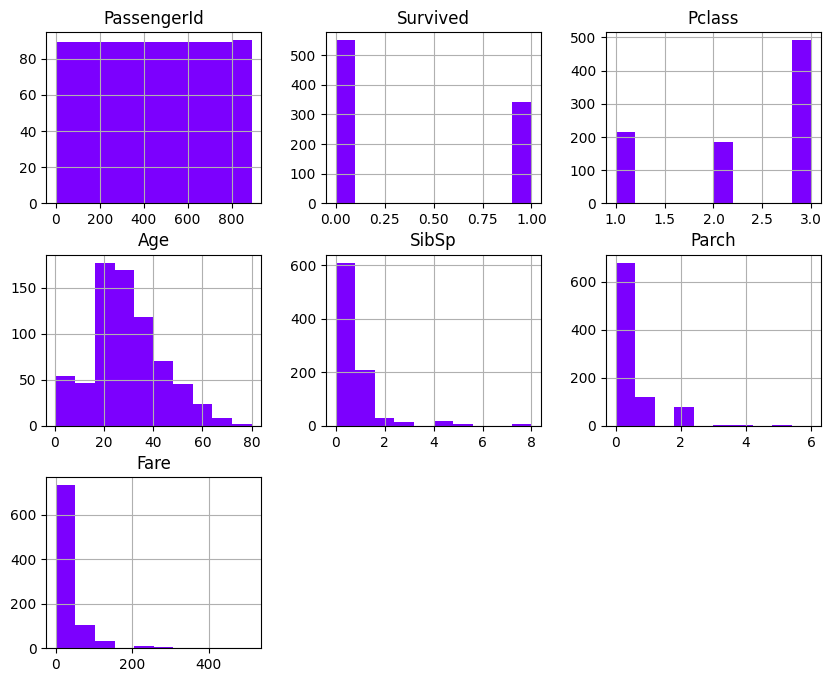

In [15]:
train_data.hist(figsize = (10, 8), color = '#7C00FE')
plt.show()

In [16]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
train_data["Ticket"].nunique()

681

In [18]:
train_data["Embarked"].nunique()

3

In [19]:
cols_to_drop = ["Name", "Ticket", "Embarked", "Cabin"]

X_tr_dropped = X_train.drop(cols_to_drop, axis = 1)
X_test_dropped = X_test.drop(cols_to_drop, axis = 1)

In [20]:
X_tr_dropped.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

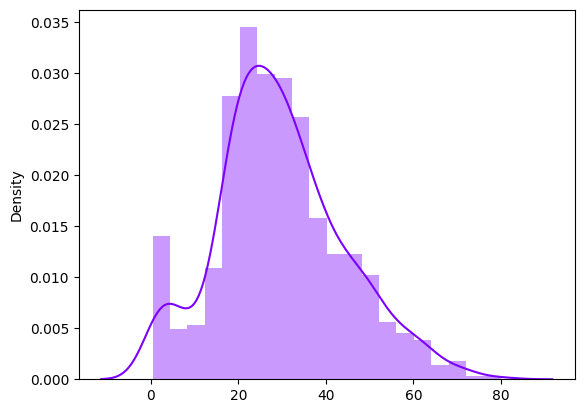

In [21]:
sns.distplot(x = train_data["Age"], kde = True,color = '#7C00FE')
plt.show()

In [22]:
train_data["Age"].mean()

29.69911764705882

In [23]:
train_data["Age"].median()

28.0

In [24]:
X_tr_dropped.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,male,22.0,1,0,7.2500
1,2,1,female,38.0,1,0,71.2833
2,3,3,female,26.0,0,0,7.9250
3,4,1,female,35.0,1,0,53.1000
4,5,3,male,35.0,0,0,8.0500


# Encoding categorical columns

In [25]:
X_tr_dropped["Sex"] = np.where(X_tr_dropped["Sex"] == 'male', 0, 1)
X_test_dropped["Sex"] = np.where(X_test_dropped["Sex"] == 'male', 0, 1)

# Filling missing values

In [26]:
X_tr_dropped["Age"].fillna(X_tr_dropped["Age"].mean(), inplace = True)
X_test_dropped["Age"].fillna(X_test_dropped["Age"].mean(), inplace = True)
X_tr_dropped.isnull().sum().sum()

0

# Scaling the data

In [27]:
X_test_dropped

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.50000,0,0,7.8292
1,893,3,1,47.00000,1,0,7.0000
2,894,2,0,62.00000,0,0,9.6875
3,895,3,0,27.00000,0,0,8.6625
4,896,3,1,22.00000,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,0,0,8.0500
414,1306,1,1,39.00000,0,0,108.9000
415,1307,3,0,38.50000,0,0,7.2500
416,1308,3,0,30.27259,0,0,8.0500


In [28]:
X_test_dropped["Fare"].fillna(X_test_dropped["Fare"].mode()[0], inplace = True)

In [29]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
scaler = StandardScaler()
X_tr_scaled = X_tr_dropped.copy()
X_test_scaled = X_test_dropped.copy()
X_tr_scaled[columns_to_scale] = scaler.fit_transform(X_tr_dropped[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test_dropped[columns_to_scale])
X_tr_scaled

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0.827377,-0.737695,-0.592481,0.432793,-0.473674,-0.502445
1,2,-1.566107,1.355574,0.638789,0.432793,-0.473674,0.786845
2,3,0.827377,1.355574,-0.284663,-0.474545,-0.473674,-0.488854
3,4,-1.566107,1.355574,0.407926,0.432793,-0.473674,0.420730
4,5,0.827377,-0.737695,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...
886,887,-0.369365,-0.737695,-0.207709,-0.474545,-0.473674,-0.386671
887,888,-1.566107,1.355574,-0.823344,-0.474545,-0.473674,-0.044381
888,889,0.827377,1.355574,0.000000,0.432793,2.008933,-0.176263
889,890,-1.566107,-0.737695,-0.284663,-0.474545,-0.473674,-0.044381


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_tr_scaled, y_train)

LogisticRegression(random_state=42)

In [31]:
X_test_scaled.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [32]:
X_test_dropped[X_test_dropped["Fare"].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare


In [33]:
y_train.shape

(891,)

In [34]:
X_tr_scaled.shape

(891, 7)

In [35]:
preds = log_reg.predict(X_tr_scaled)

In [36]:
accuracy_score(preds, y_train)

0.797979797979798

In [37]:
pred_test = log_reg.predict(X_test_scaled)
pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [38]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(X_tr_dropped, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
preds_train = dec_tree.predict(X_tr_dropped)
accuracy_score(preds_train, y_train)

1.0

In [40]:
pred_test = dec_tree.predict(X_test_dropped)
pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
submit = pd.read_csv(r'/kaggle/input/titanic/gender_submission.csv')
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [42]:
X_train.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [43]:
ids = X_test["PassengerId"]
pred_test_df = pd.DataFrame(pred_test, columns = ["Survived"])
submit_1 = pd.concat([ids, pred_test_df], axis = 1)
submit_1.shape

(418, 2)

In [44]:
submit_1.to_csv('output.csv', index_label = "PassengerId")  